<a href="https://colab.research.google.com/github/Rinch1/stock-predictions/blob/main/Reliance_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install prophet

In [30]:
!pip install plotly

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import time
from prophet import Prophet
reliance = yf.download("RELIANCE.NS", start="2014-01-01", end="2024-12-31", auto_adjust=False)
time.sleep(5)
df = reliance
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
2014-01-01,195.359894,203.164734,205.324844,202.890427,205.141968,5849398
2014-01-02,192.326645,200.010284,204.810532,198.890228,202.913284,6023632
2014-01-03,189.963760,197.553009,199.633118,195.438614,199.233093,12833897
2014-01-06,187.919617,195.427185,197.324432,194.295700,197.061554,13315857
2014-01-07,185.095154,192.489899,196.570099,192.021301,195.347183,17311470


In [3]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
2024-12-23,1222.300049,1222.300049,1227.199951,1213.199951,1215.000000,10052824
2024-12-24,1222.750000,1222.750000,1233.550049,1221.000000,1222.300049,6734917
2024-12-26,1216.550049,1216.550049,1227.699951,1214.250000,1224.250000,10016178
2024-12-27,1221.050049,1221.050049,1227.900024,1217.000000,1218.300049,7000397
2024-12-30,1210.699951,1210.699951,1223.199951,1208.099976,1216.400024,8818766


In [4]:
df.shape

(2710, 6)

In [5]:
df.isnull().sum()

,,0
Price,Ticker,
Adj Close,RELIANCE.NS,0
Close,RELIANCE.NS,0
High,RELIANCE.NS,0
Low,RELIANCE.NS,0
Open,RELIANCE.NS,0
Volume,RELIANCE.NS,0


In [6]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
count,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2.710000e+03
mean,689.661006,696.176232,703.810619,689.173654,696.686920,1.807056e+07
std,427.087894,427.878524,431.935758,424.136894,428.184511,1.313834e+07
min,175.830521,182.855118,184.420914,181.289322,182.889404,0.000000e+00
25%,235.766895,240.138062,242.792484,237.983665,240.275208,1.060173e+07
50%,578.639862,584.555756,591.230377,579.846954,585.950134,1.448569e+07
75%,1104.915955,1114.781738,1126.699890,1102.355804,1117.325745,2.059643e+07
max,1595.484985,1600.900024,1608.800049,1585.500000,1604.449951,1.426834e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2710 entries, 2014-01-01 to 2024-12-30
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (Adj Close, RELIANCE.NS)  2710 non-null   float64
 1   (Close, RELIANCE.NS)      2710 non-null   float64
 2   (High, RELIANCE.NS)       2710 non-null   float64
 3   (Low, RELIANCE.NS)        2710 non-null   float64
 4   (Open, RELIANCE.NS)       2710 non-null   float64
 5   (Volume, RELIANCE.NS)     2710 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 148.2 KB


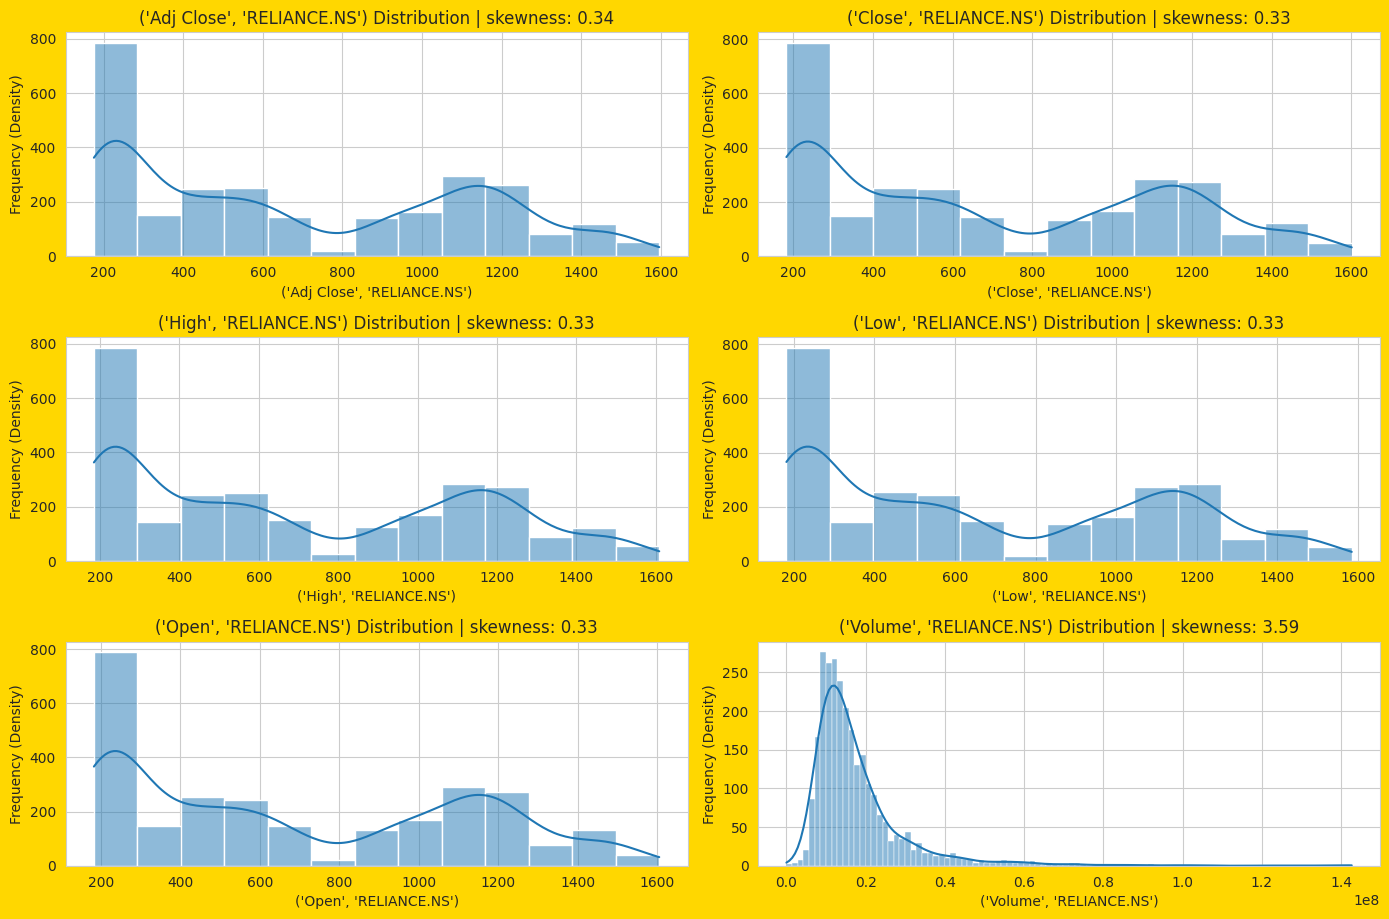

In [8]:
sns.set_style("whitegrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3,), facecolor="gold")
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} Distribution | skewness: {round (df[feature].skew(), 2)}")
    plt.xlabel(feature)
    plt.ylabel("Frequency (Density)")

plt.tight_layout()
plt.show()

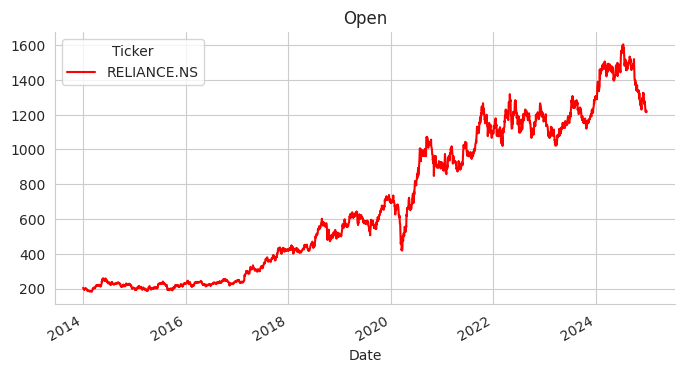

In [9]:
df['Open'].plot(kind='line', figsize=(8, 4), title='Open', color="red")
plt.gca().spines[['top', 'right']].set_visible(False)

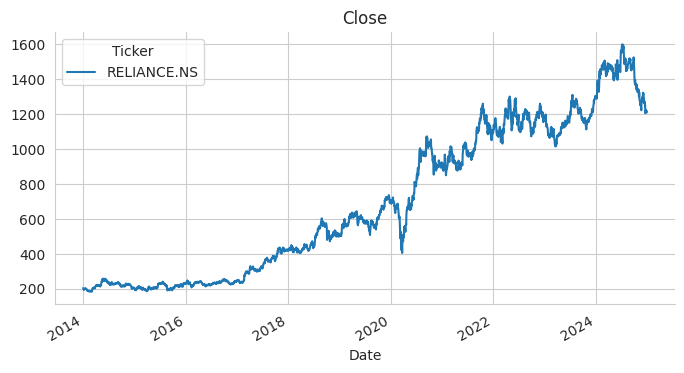

In [10]:
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
df.columns = df.columns.droplevel('Ticker')
df.head(2)

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-01-01,195.359894,203.164734,205.324844,202.890427,205.141968,5849398
2014-01-02,192.326645,200.010284,204.810532,198.890228,202.913284,6023632


In [12]:
df_reset = df.reset_index()
df_reset.tail(2)

Price,Date,Adj Close,Close,High,Low,Open,Volume
2708,2024-12-27,1221.050049,1221.050049,1227.900024,1217.000000,1218.300049,7000397
2709,2024-12-30,1210.699951,1210.699951,1223.199951,1208.099976,1216.400024,8818766


In [13]:
df_prophet = df_reset[['Date', 'Close']].copy()
df_prophet.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
print("\nPrepared DataFrame for Prophet:")
df_prophet.head(2)


Prepared DataFrame for Prophet:


Price,ds,y
0,2014-01-01,203.164734
1,2014-01-02,200.010284


In [14]:
print("\nInitializing and fitting the Prophet model...")
model = Prophet(changepoint_prior_scale=0.01, seasonality_prior_scale=1, daily_seasonality=True, yearly_seasonality=True, weekly_seasonality=True)
print("Adding India holidays...")
model.add_country_holidays(country_name='IN')
model.fit(df_prophet)
print("Model fitting complete.")


Initializing and fitting the Prophet model...
Adding India holidays...


/usr/local/lib/python3.11/dist-packages/holidays/countries/india.py:180: Warning: Requested Holidays are available only from 2001 to 2035.
  warnings.warn(warning_msg, Warning)
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwwb7m95/45yp8xgq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwwb7m95/v52294hx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31057', 'data', 'file=/tmp/tmptwwb7m95/45yp8xgq.json', 'init=/tmp/tmptwwb7m95/v52294hx.json', 'output', 'file=/tmp/tmptwwb7m95/prophet_modelgs1lwiil/prophet_model-20250505115219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:52:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:52:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model fitting complete.


In [15]:
future_periods = 365 # Predict for the next year
print(f"\nCreating future dataframe for {future_periods} days...")
future = model.make_future_dataframe(periods=future_periods)
print("Future dataframe created:")
print(future.tail())


Creating future dataframe for 365 days...
Future dataframe created:
             ds
3070 2025-12-26
3071 2025-12-27
3072 2025-12-28
3073 2025-12-29
3074 2025-12-30


In [16]:
# --- 5. Make Predictions ---
print("\nMaking predictions...")
forecast = model.predict(future)
print("Predictions generated:")
# Display forecast for the last few historical days and future days
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())



Making predictions...
Predictions generated:
             ds         yhat   yhat_lower   yhat_upper
3070 2025-12-26  1514.721978  1421.786511  1607.055334
3071 2025-12-27  1574.706867  1487.949332  1659.887361
3072 2025-12-28  1502.710170  1407.805131  1597.710067
3073 2025-12-29  1518.841752  1425.774061  1615.670721
3074 2025-12-30  1522.474194  1438.055166  1608.725085


INFO:prophet:Making 15 forecasts with cutoffs between 2017-02-05 00:00:00 and 2023-12-31 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x79701ad687d0>



Running Prophet Cross-Validation...


DEBUG:cmdstanpy:input tempfile: /tmp/tmptwwb7m95/k4np9ni_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwwb7m95/zvns64w4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwwb7m95/aknvf0ec.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30395', 'data', 'file=/tmp/tmptwwb7m95/k4np9ni_.json', 'init=/tmp/tmptwwb7m95/aknvf0ec.json', 'output', 'file=/tmp/tmptwwb7m95/prophet_modeljv8kxrse/prophet_model-20250505115221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:52:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwwb7m95/owb5i1t8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74721', 'data


Cross-Validation Results (sample - shows individual forecast points):
          ds           y        yhat     cutoff
0 2017-02-06  238.103668  230.742842 2017-02-05
1 2017-02-07  235.646393  229.757982 2017-02-05
2 2017-02-08  234.332047  229.540451 2017-02-05
3 2017-02-09  236.069275  229.044577 2017-02-05
4 2017-02-10  235.474960  228.635731 2017-02-05

Calculating Performance Metrics from Cross-Validation...

Performance Metrics (aggregated by horizon):
  horizon           mse        rmse        mae      mape     mdape     smape  \
0 37 days  11066.140322  105.195724  79.240803  0.095402  0.077498  0.097871   
1 38 days  11326.180575  106.424530  80.095970  0.096516  0.077498  0.099176   
2 39 days  11649.880628  107.934613  81.276452  0.097939  0.078629  0.100752   
3 40 days  11961.549649  109.368870  82.550168  0.099635  0.081584  0.102519   
4 41 days  11879.235827  108.991907  82.613222  0.099970  0.084163  0.102714   

   coverage  
0  0.310074  
1  0.310074  
2  0.307617  


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


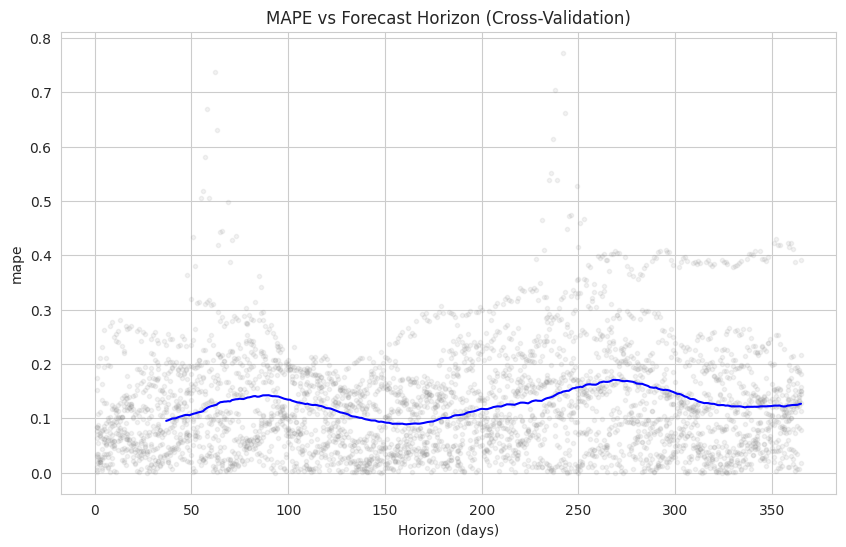

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


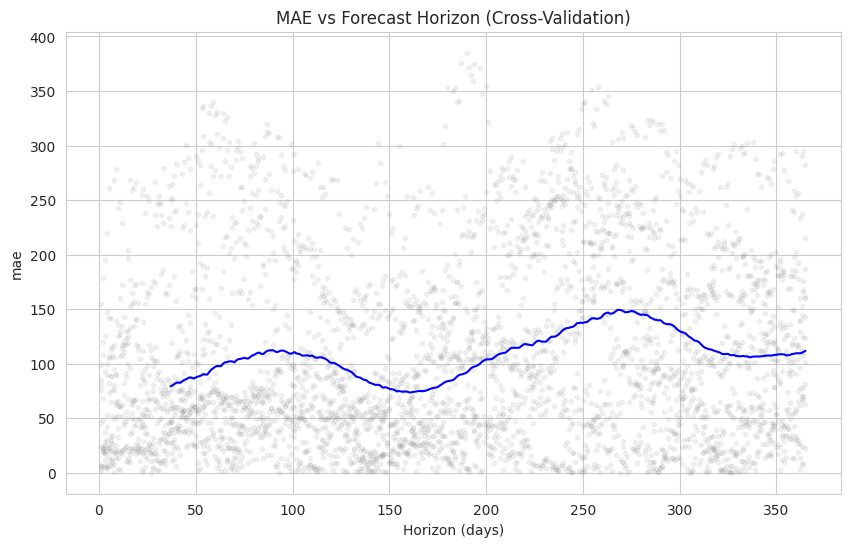

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


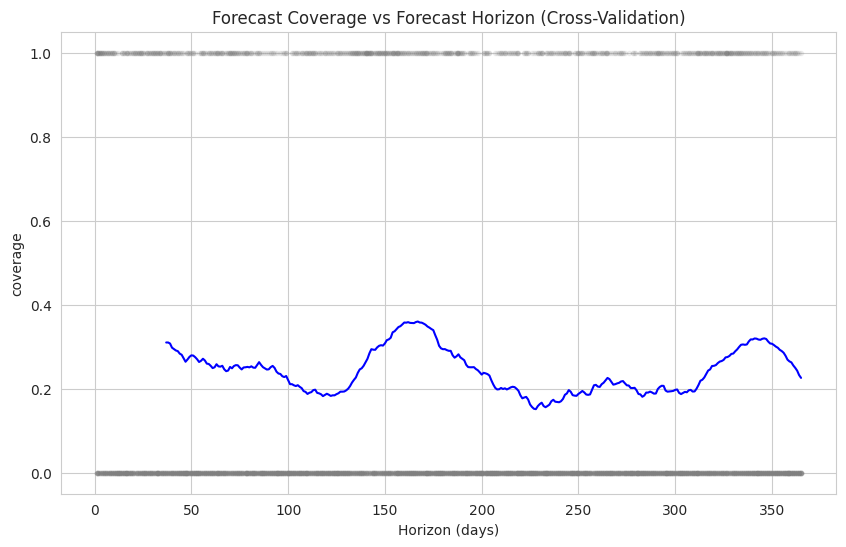

In [17]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt


print("\nRunning Prophet Cross-Validation...")

initial_period = '1095 days' # Start training with 3 years
forecast_horizon = '365 days'  # Predict 1 year ahead
cutoff_period = '180 days'   # Make a new forecast every 6 months
# ---

try:
    # Use parallel="processes" for potentially faster execution if you have multiple cores
    df_cv = cross_validation(model, initial=initial_period, period=cutoff_period, horizon=forecast_horizon,
                             parallel="processes", disable_tqdm=False) # disable_tqdm=False shows progress bar

    print("\nCross-Validation Results (sample - shows individual forecast points):")
    print(df_cv[['ds', 'y', 'yhat', 'cutoff']].head())

    # 2. Calculate Performance Metrics (aggregated over simulation)
    print("\nCalculating Performance Metrics from Cross-Validation...")
    df_p = performance_metrics(df_cv)

    print("\nPerformance Metrics (aggregated by horizon):")
    print(df_p.head())
    # Key metrics: 'mae', 'mape', 'rmse', 'coverage'

    # Visualize Metrics
    print("\nPlotting Cross-Validation Metrics...")
    # Plot MAPE - shows % error vs. forecast horizon
    fig_mape = plot_cross_validation_metric(df_cv, metric='mape')
    plt.title('MAPE vs Forecast Horizon (Cross-Validation)')
    plt.show()

    # Plot MAE - shows absolute error vs. forecast horizon
    fig_mae = plot_cross_validation_metric(df_cv, metric='mae')
    plt.title('MAE vs Forecast Horizon (Cross-Validation)')
    plt.show()

    # Plot Coverage - shows how often the actual value fell within the uncertainty interval
    fig_cov = plot_cross_validation_metric(df_cv, metric='coverage')
    plt.title('Forecast Coverage vs Forecast Horizon (Cross-Validation)')
    plt.show()


except Exception as e:
    print(f"\nError during Prophet diagnostics: {e}")
    print("Check if 'initial', 'period', 'horizon' are appropriate for your data length.")
    import traceback
    traceback.print_exc()

In [18]:
import plotly.graph_objs as go
from prophet.plot import plot_plotly, plot_components_plotly
import pandas as pd

# --- Generating Plotly Plots ---
print("\nGenerating Plotly plots...")
ticker = "RELIANCE.NS"

# Plot 1: Interactive Forecast Plot using Prophet's built-in function
print("Generating forecast plot (Plotly)...")
fig1 = plot_plotly(model, forecast)

fig1.update_layout(
    title=f'{ticker} Stock Price Forecast (Plotly)',
    xaxis_title='Date',
    yaxis_title='Close Price'
)
fig1.show()

# Plot 2: Interactive Components Plot using Prophet's built-in function
print("Generating components plot (Plotly)...")

fig2 = plot_components_plotly(model, forecast)
fig2.show()

# Plot 3: Custom interactive plot comparing actual vs forecast using plotly.graph_objects
print("Generating custom comparison plot (Plotly)...")
fig3 = go.Figure()

fig3.add_trace(go.Scatter(
    x=df_prophet['ds'],
    y=df_prophet['y'],
    mode='lines',
    name='Actual Price',
    line=dict(color='royalblue')
))

fig3.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat'],
    mode='lines',
    name='Forecast (yhat)',
    line=dict(color='darkorange', dash='dash')
))

fig3.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_lower'],
    mode='lines',
    line=dict(width=0, color='rgba(255, 165, 0, 0.3)'),
    hoverinfo='skip',
    showlegend=False,
    name='Lower Bound'
))

fig3.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat_upper'],
    mode='lines',
    line=dict(width=0, color='rgba(255, 165, 0, 0.3)'),
    fillcolor='rgba(255, 165, 0, 0.3)',
    fill='tonexty',
    hoverinfo='skip',
    name='Uncertainty Interval'
))

# Update layout for titles, labels, interactivity
fig3.update_layout(
    title=f'{ticker} Actual Price vs. Prophet Forecast (Plotly)',
    xaxis_title='Date',
    yaxis_title='Close Price',
    hovermode='x unified',
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
    xaxis_rangeslider_visible=True
)
fig3.show()

print("\nScript finished.")


Generating Plotly plots...
Generating forecast plot (Plotly)...


Generating components plot (Plotly)...


/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



Generating custom comparison plot (Plotly)...



Script finished.


In [19]:
#SAVING THE MODEL.
from prophet.serialize import model_to_json, model_from_json

print("Saving model to JSON...")
with open('prophet_model.json', 'w') as fout:
    fout.write(model_to_json(model))
print("Model saved.")

Saving model to JSON...
Model saved.


In [20]:
print("Loading model from JSON...")
with open('prophet_model.json', 'r') as fin:
    loaded_model = model_from_json(fin.read())
print("Model loaded.")

Loading model from JSON...
Model loaded.
